In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb
(train_inputs, train_outputs), (test_inputs, test_outputs) = imdb.load_data()

Loaded IMDB dataset consisting of 50000 movie reviews, split into 25000 training samples and 25000 test samples.  The input is a movie review with words mapped to their relative frequency, and the output is a class label 1 or 0, indicating a good or bad overall assessment.  Note that both the training and test data are balanced, with 50% good reviews and 50% bad reviews.

In [3]:
train_inputs.shape

(25000,)

In [4]:
test_inputs.shape

(25000,)

In [5]:
train_inputs[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [6]:
train_outputs[0]

1

In [7]:
DIMENSION = 10000
import numpy as np

def one_hot_encoding(sequences, dimension = DIMENSION):
    result = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for j in range(len(sequences[i])):
            if sequences[i][j] < dimension:
                result[i][sequences[i][j]] = 1
    
    return result    

In [8]:
train_inputs = one_hot_encoding(train_inputs)
test_inputs = one_hot_encoding(test_inputs)

Set DIMENSION variable as the cutoff for word frequency in the input data; in our case, we consider only the 10000 most common words appearing in our inputs.

Transform inputs via one-hot encoding, mapping a list of integers to a vector of length DIMENSION with values 0 or 1 at the k-th entry depending upon the absence or presence of k in our list.  

In [9]:
train_inputs[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [10]:
train_outputs.min(axis = 0)

0

In [11]:
train_outputs.max(axis = 0)

1

In [12]:
train_outputs[0: 5]

array([1, 0, 0, 1, 0])

In [13]:
train_outputs = train_outputs.astype('float32')
test_outputs = test_outputs.astype('float32')

Type conversion of integral outputs to floating point values, a necessary step prior to model training.

In [14]:
reduced_train_inputs = train_inputs[0: 15000]
reduced_train_outputs = train_outputs[0: 15000]

In [15]:
validation_inputs = train_inputs[15000:]
validation_outputs = train_outputs[15000: ]

Set aside 10000 of the 25000 training samples as a validation set.  It would be better to draw this collection randomly from our training data, rather than using the sequential approach above.

In [16]:
from keras import models
from keras import layers

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (DIMENSION,)))
model.add(layers.Dropout(.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',
             metrics = ['accuracy'])

The network is densely connected, with two intermediate layers each having 16 nodes. In each intermediate layer, we use the rectified linear unit ('relu') activation function.

Observe the sigmoid activation function in our final network layer, an appropriate choice for a binary classification model.  In addition, note the use of the binary cross-entropy loss function and the accuracy performance metric in the .compile() parameter list.

To combat overfitting, we add drop-out terms to the model.  We could instead reduce the network size or add regularization terms to the loss function (see e.g. denseNN_multiclass.ipynb).

In [19]:
EPOCHS = 15

In [20]:
outcome = model.fit(reduced_train_inputs, reduced_train_outputs, batch_size = 512, epochs = EPOCHS,
         validation_data = (validation_inputs, validation_outputs))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 4s 289us/step - loss: 0.6229 - accuracy: 0.6511 - val_loss: 0.4900 - val_accuracy: 0.8595
Epoch 2/15
15000/15000 [==============================] - 2s 132us/step - loss: 0.5028 - accuracy: 0.7700 - val_loss: 0.3990 - val_accuracy: 0.8712
Epoch 3/15
15000/15000 [==============================] - 2s 118us/step - loss: 0.4152 - accuracy: 0.8294 - val_loss: 0.3244 - val_accuracy: 0.8829
Epoch 4/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.3478 - accuracy: 0.8646 - val_loss: 0.2907 - val_accuracy: 0.8849
Epoch 5/15
15000/15000 [==============================] - 2s 117us/step - loss: 0.3066 - accuracy: 0.8861 - val_loss: 0.2832 - val_accuracy: 0.8825
Epoch 6/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.2663 - accuracy: 0.9057 - val_loss: 0.2938 - val_accuracy: 0.8759
Epoch 7/15
15000/15000 [==============================] - 3s 1

In [21]:
outcome.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

The .fit() method returns an object with a .history map attribute, encoding training and validation loss and accuracy for each epoch.

In [22]:
epochs = range(1, EPOCHS + 1)

In [23]:
accuracy = outcome.history.get('accuracy')
val_accuracy = outcome.history.get('val_accuracy')

In [24]:
import matplotlib.pyplot as plt

[]

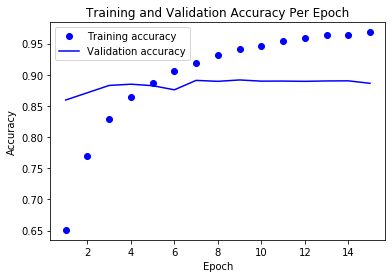

In [25]:
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.plot()

The plot above shows a monotonic increase in training accuracy and an increase and mild decline in validation accuracy.  This behavior can also be seen in the callbacks generated by the .fit() method above.  The model appears to be overfitting the training data as we iterate over more and more epochs.  One way to combat this overfitting is to partially train the model, halting training at an early epoch (say, the fourth epoch).  Further steps beyond this early stopping and our earlier use of drop-out include adding regularization terms to the loss function (see e.g. denseNN_multiclass.ipynb) or decreasing the network size.  

In [26]:
model.evaluate(test_inputs, test_outputs)

25000/25000 [==============================] - 4s 174us/step


[0.475156324903965, 0.8742799758911133]